**Group ID: Group 15**

Tyler Brannon - TylerBran

Patrick Guerin - guerinp19

Eric D’Souza - ericdagoat

Mohammadreza Rahbar - MRR02

## **Intro**
We chose this topic because we believe that this is a topic that should be explored more thoroughly, most of the time when doing research about alcohol it relates to adults. So, it’s good to take a different approach as to how it affects the youth, as alcohol consumption affects them to a similar degree as adults. We believe that with this analysis we can deliver a new perspective on this which may be used in the future, to help further understand how alcohol consumption has an affect on the youth and their daily lives. The questions we came up with for this data set include: Which ages drink the most? To find this, we will look at the age group of the students that drink and find a few age numbers where drinking is more common. Do students who drink more get lower grades? Find the number of students that drink and compare their average grades to the average of the kids that don’t drink, as well as the total number of failures from kids that drink vs. kids that don’t. Do more socially active students drink more? Check if the sociable students that have more free time tend to drink more. If they drink more, then do they miss more classes? Check for absences from students that drink compared to absences of students that don’t drink and draw conclusions. How does drinking affect the students’ health? Compare the health of students that don’t drink to the health of students that do drink. Does family size impact whether the student will drink? Compare the large family sizes of kids that drink, to the small family sizes of kids that drink and see if there’s a trend / pattern. If a student has at least one parent working their job from home, then are they more likely to drink alcohol? Take all the data of kids with at least one parent that works from home and check if it's common for the kid to drink alcohol. Do students worse with family relations tend to drink more? The members of our group include:
-	Tyler Brannon: Introductions and Analysis for questions 3 and 5
-	Patrick Guerin: Analysis of the data, Description of the data and Analysis for questions 7 and 8
-	Eric D’Souza: Potential Data Science and Analysis for questions 1 and 5
-	Mohammadreza Rahbar: Potential Data Science and Analysis for questions 2 and 4


## **Description of data:**
The dataset we chose is about student alcohol consumption. The dataset can be found here (https://www.kaggle.com/uciml/student-alcohol-consumption ). The dataset contains information on students drinking habits on weekends and weekdays as well as some other general information about the students (i.e., age, gender etc.), factors that may contribute to a student’s drinking habits (i.e., free time, home life) and factors that may be affected by a student’s drinking habits (i.e., grades). The data was collected through a survey conducted amongst groups of students taking mathematics and Portuguese language course at two different universities in Italy. The data is also split into two different tables based on this the classes the students surveyed one for math students and one for Portuguese language students. 

In [22]:
#setup
import csv
import re
import pandas as pd
from functools import reduce
import numpy as np
import calendar
import string
import matplotlib.pyplot as plt
import seaborn as sns

def open_csv(file_name):
    collection = []
    with open(file_name, 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
    
students_math = open_csv('student-mat.csv')
students_por = open_csv('student-por.csv')

**Data Cleaning**

1.) combine both tables to make the data easier to work with

2.) parse any numbers represented as strings to ints (i.e., goout is represented as a string so we should parse it to a int)

3.) get rid of any unreadable data points (i.e., any NA values)

4.) drop any students that appear in both data sets (there is a note at the bottom of the dataset link to the dataset that explain how to determine how a student is in both datasets)

## **Analysis of Data:**
The Data as mentioned prior is split into two tables one that tracks the math students surveyed and the other tracks the other tracks the Portuguese language students. Both these tables contain 33 columns with both tables containing identical data on said students. Since this is the case the first thing we should do when cleaning the data is combine the tables into one to make it dealing with the easier. Next, we should remove any unreadable data from the table (i.e., any Na values). After we have removed all unreadable data, we should check for students who appear in both tables and remove one of their instances, so they aren’t overrepresented in the data. The way we check for whether a student appear in both tables is described in the link to dataset. However, the steps are as follows first we check the school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, nursery, and internet columns. If all these attributes match for any two data points, they are considered identical, and we can remove the second instance of the student. Lastly, all the numeric values in the table are stored as strings in the table so we need to parse all numeric values to int’s/floats based on what is appropriate for the given column. 
	Regarding the data itself, it was collected through a survey as mentioned prior. However, we have no information on how the survey was conducted so its difficult to determine the quality of the data. Its difficult to determine the quality of the survey questions however, the data for the most part is objective so worrying about the quality of the data as result of survey questions is a bit of a nonissue. However, there are a few cases where we should worry about the quality of the data as result of the question take the family relations data for example, this is difficult thing to quantify and students with comparable relationships may have varying opinions on the quality of said relationships, so if the questions to determine the student’s relationship with there parents weren’t carefully selected to as clear and unbiased as possible it could influence how students answer.  We also have no way of determining honesty, so we must assume that all students answered truthfully which may or may no be true, this could also affect the quality of the data. The last thing that may affect the quality is the amount of data after cleaning. The tables to begin with are only a little over 1000 elements combine and our data cleaning could force us to dismiss a large quantity of data as result and this could affect the quality of the result of our question. However, this problem could be further compounded by the fact that we need to divide data into certain cohorts when answering questions and we cannot expect that each cohort will have the same amount of data points in it. this problem compounded with the possible lack of data point could mean we have cohorts with 10 data points compared with cohort of 400 data points. This lack of data could skew what or data shows and thus affect the result of our question.
    
**(see Summary of Data at Bottom for description of all data attributes.)**

In [91]:
# combining tables and removing duplicate students
df_port = pd.DataFrame(students_por)
df_math = pd.DataFrame(students_math)
df_combine =  pd.concat([df_port,df_math])
df_combine = df_combine.reset_index()
considered = ["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]
#df_combine = df_combine.drop(labels = 'index', axis=1)
df_combine = df_combine.drop_duplicates(subset=considered,ignore_index = True)
df_combine

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,4,0,11,11
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,2,9,11,11
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,6,12,13,12
3,3,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,0,14,14,14
4,4,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,370,MS,F,19,U,LE3,T,3,2,services,...,3,2,2,1,1,3,4,7,7,9
658,376,MS,F,20,U,GT3,T,4,2,health,...,5,4,3,1,1,3,4,15,14,15
659,390,MS,M,20,U,LE3,A,2,2,services,...,5,5,4,4,5,4,11,9,9,9
660,392,MS,M,21,R,GT3,T,1,1,other,...,5,5,3,3,3,3,3,10,8,7


In [56]:
#parsing to ints
df_combine['age'] = df_combine['age'].apply(pd.to_numeric)
df_combine['Medu'] = df_combine['Medu'].apply(pd.to_numeric)
df_combine['Fedu'] = df_combine['Fedu'].apply(pd.to_numeric)
df_combine['traveltime'] = df_combine['traveltime'].apply(pd.to_numeric)
df_combine['studytime'] = df_combine['studytime'].apply(pd.to_numeric)
df_combine['famrel'] = df_combine['famrel'].apply(pd.to_numeric)
#df_combine['freetime'] = df_combine['freetime'].apply(pd.to_numeric)
#df_combine['goout'] = df_combine['goout'].apply(pd.to_numeric)
df_combine['Dalc'] = df_combine['Dalc'].apply(pd.to_numeric)
df_combine['Walc'] = df_combine['Walc'].apply(pd.to_numeric)
df_combine['health'] = df_combine['health'].apply(pd.to_numeric)
df_combine['absences'] = df_combine['absences'].apply(pd.to_numeric)
df_combine['G1'] = df_combine['G1'].apply(pd.to_numeric)
df_combine['G2'] = df_combine['G2'].apply(pd.to_numeric)
df_combine['G3'] = df_combine['G3'].apply(pd.to_numeric)

In [57]:
#removing unreadable data
df_combine= df_combine.dropna(how="any")

**Exploring The Data**<br>
1.) What are the different columns and how many are there

2.) how do the students surveyed range in age

3.) how many math students were surveyed compared to portuguse students

4.) is there even distribution of male vs female students surveyed

5.) what are the different job categories in the table

6.) how many attend each students attend each school out of the students surveyed

In [58]:
#shows all keys and total number of keys
print(df_combine.keys())
print('total columns: %d'%len(df_combine.keys()))

Index(['index', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
total columns: 34


from this we can see that there are 33 different statistic tracked

In [59]:
#shows number of students surveyed for each table
print("Math Students Surveyed: %d"%len(df_math))
print("Portuguese Students Surveyed: %d"%len(df_port))

Math Students Surveyed: 395
Portuguese Students Surveyed: 649


From this we can see that more portugese language students surveyed compared to math students

F    390
M    272
Name: sex, dtype: int64

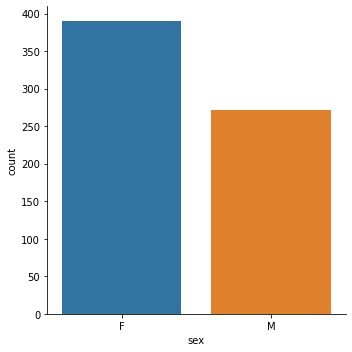

In [60]:
sns.catplot(data=df_combine,kind='count', x="sex")
df_combine['sex'].value_counts()

from this we can see that slightly more female students were surveyed than male students

In [61]:
print("minimun age: %d"%df_combine['age'].min())
print("maximun age: %d"%df_combine['age'].max())
print("range:       %d"%(df_combine['age'].max()-df_combine['age'].min()))

minimun age: 15
maximun age: 22
range:       7


from this we can see that the youngest students surveyed were 15 and the oldest were 22 this gives us a range of 7

In [62]:
np.unique(df_combine[['Fjob','Mjob']])

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

GP    434
MS    228
Name: school, dtype: int64

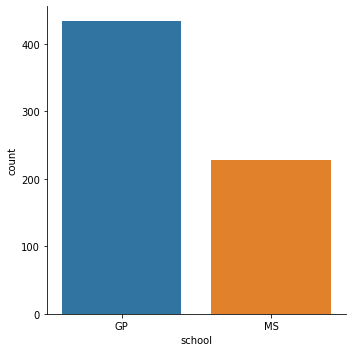

In [63]:
sns.catplot(data=df_combine,kind='count', x="school")
df_combine['school'].value_counts()

from the graph we can see that a moderate amount more students from GP then from MS that were surveyed

**Question 1**<br>Which ages drink the most? Look at age groups of students that drink and find a few age numbers where drinking is more commmon.

In [64]:
count_age = df_combine['age'].value_counts()
count_age

17    178
16    173
18    142
15    112
19     45
20      8
21      3
22      1
Name: age, dtype: int64

In [65]:
# group by ages of average alcohol consumption for weekdays and weekends
grouped_Dalc = df_combine.groupby('age')['Dalc'].mean().reset_index()
grouped_Walc = df_combine.groupby('age')['Walc'].mean().reset_index()

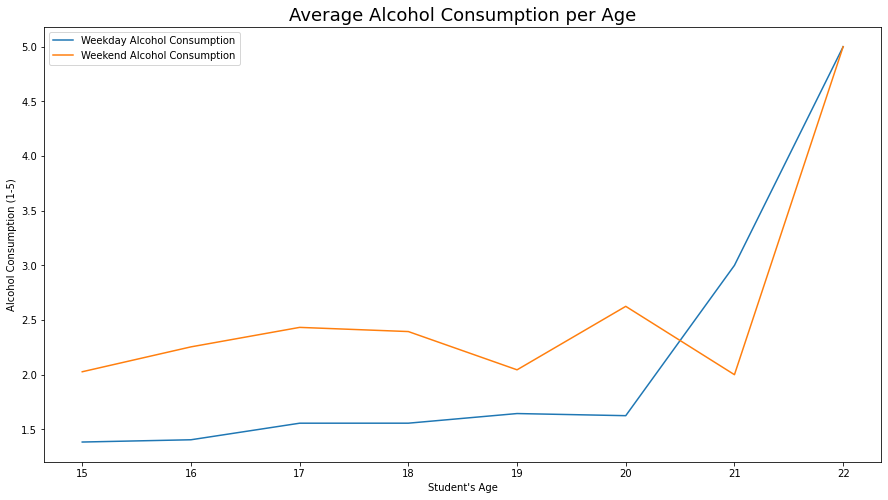

In [66]:
plt.rcParams["figure.figsize"] = (15,8)

sns.lineplot(x=grouped_Dalc["age"], y=grouped_Dalc["Dalc"])
sns.lineplot(x=grouped_Walc["age"], y=grouped_Walc["Walc"])

plt.title("Average Alcohol Consumption per Age", size=18)
plt.xlabel("Student's Age")
plt.ylabel("Alcohol Consumption (1-5)")
plt.legend(["Weekday Alcohol Consumption", "Weekend Alcohol Consumption"])

As we can see from the chart above, substantially more students from ages 15-18 drink more on weekends (with the age 17 being the most), compared to weekdays. This makes sense since the majority of kids typically have parties or meet with friends on weekends and have the time available to do so, resulting in more alcohol consumption because of that. The students also have to go to school on weekdays, which also explains why consumption is low during weekdays.

**Question 2**<br>
Do students who drink more get lower grades? Find the number of students that drink and compare their average grades to the average of the kids that don’t drink, as well as the total number of failures from kids that drink vs. kids that don’t.

In [99]:
print("Do students that drink more, perform worse academically?:")
print("(smaller numbers for grades and higher numbers failures means worse academic performance)")
print("")
#weekday drinkers absence correlation for math class (smaller number means worse performance):
col1 = datasetm["Dalc"]
col2 = datasetm["G3"]
correlation = col1.corr(col2)
print("weekday drinkers final grade correlation for math class: "+str(correlation))

#weekday drinkers absence correlation for math class:
col1 = datasetp["Dalc"]
col2 = datasetp["G3"]
correlation = col1.corr(col2)
print("weekday drinkers final grade correlation for portugese class: "+str(correlation))

#weekend drinkers absence correlation for math class:
col1 = datasetm["Walc"]
col2 = datasetm["G3"]
correlation = col1.corr(col2)
print("weekend drinkers final grade correlation for math class: "+str(correlation))

#weekend drinkers absence correlation for portugese class:
col1 = datasetp["Walc"]
col2 = datasetp["G3"]
correlation = col1.corr(col2)
print("weekend drinkers final grade correlation for portugese class: "+str(correlation))

print("--------------")

#weekday drinkers failure correlation for math class: (higher number means more likely for more past failures)
col1 = datasetm["Dalc"]
col2 = datasetm["failures"]
correlation = col1.corr(col2)
print("weekday drinkers failed classes correlation for math class: "+str(correlation))

#weekday drinkers failure correlation for portugese class:
col1 = datasetp["Dalc"]
col2 = datasetp["failures"]
correlation = col1.corr(col2)
print("weekday drinkers failed classes correlation for portugese class: "+str(correlation))

#weekend drinkers failure correlation for math class:
col1 = datasetm["Walc"]
col2 = datasetm["failures"]
correlation = col1.corr(col2)
print("weekend drinkers failed classes correlation for math class: "+str(correlation))

#weekend drinkers failure correlation for portugese class:
col1 = datasetp["Walc"]
col2 = datasetp["failures"]
correlation = col1.corr(col2)
print("weekend drinkers failed classes correlation for portugese class: "+str(correlation))
print("")
print("The data shows that the more students drink, the less their final grade is, and the more classes they fail.")

Do students that drink more, perform worse academically?:
(smaller numbers for grades and higher numbers failures means worse academic performance)

weekday drinkers final grade correlation for math class: -0.05466004056673598
weekday drinkers final grade correlation for portugese class: -0.2047193972481568
weekend drinkers final grade correlation for math class: -0.05193932374224616
weekend drinkers final grade correlation for portugese class: -0.17661887420966435
--------------
weekday drinkers failed classes correlation for math class: 0.1360469312165467
weekday drinkers failed classes correlation for portugese class: 0.10594909220788203
weekend drinkers failed classes correlation for math class: 0.14196202998571536
weekend drinkers failed classes correlation for portugese class: 0.08226626469230709

The data shows that the more students drink, the less their final grade is, and the more classes they fail.


Text(0, 0.5, 'Final Grade')

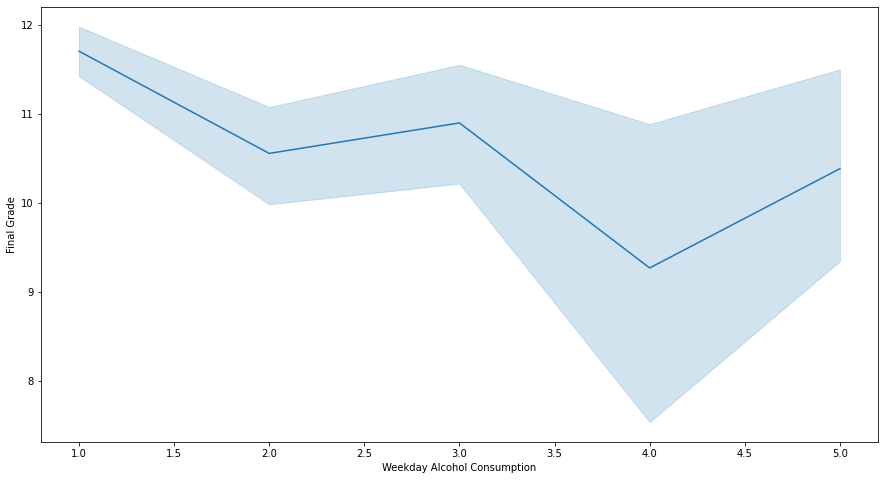

In [100]:
plt.figure(figsize=(15,8))
sns.lineplot(x="Dalc", y="G3", data=dataset)

plt.xlabel("Weekday Alcohol Consumption")
plt.ylabel("Final Grade")


In the graphs above, we see that regardless of the time of the week, students with higher alcohol consumption finish their courses with lower grades


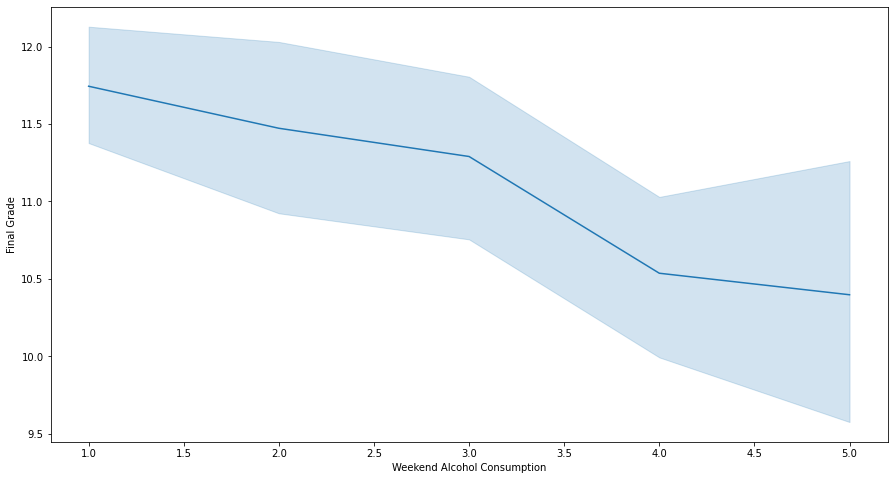

In [102]:
plt.figure(figsize=(15,8))
sns.lineplot(x="Walc", y="G3", data=dataset)

plt.xlabel("Weekend Alcohol Consumption")
plt.ylabel("Final Grade")
print("")
print("In the graphs above, we see that regardless of the time of the week, students with higher alcohol consumption finish their courses with lower grades")

In [106]:
print("Comparing the failure rate of average heavy drinkers (above 2/5 on weekdays and weekends) to students who drink less than that")
print("")
heavyresultset = dataset[(dataset['Dalc'] > 2) & (dataset['Walc'] > 2)]

print("Average heavy drinker class failures: " + str(heavyresultset['failures'].mean()))


lightresultset = dataset[(dataset['Dalc'] < 3) & (dataset['Walc'] < 3)]

print("Average light drinker class failures: " + str(lightresultset['failures'].mean()))
print("")
print("The data above shows that heavy drinkers fail twice the amount of classes that light drinkers do on average")

Comparing the failure rate of average heavy drinkers (above 2/5 on weekdays and weekends) to students who drink less than that

Average heavy drinker class failures: 0.4424778761061947
Average light drinker class failures: 0.2112

The data above shows that heavy drinkers fail twice the amount of classes that light drinkers do on average


**Question 3**<br>
Do more socially active students drink more? Check if the sociable students that have more freetime have a tendency to drink more.

In [67]:
df_GODA = df_combine.groupby('goout')['Dalc'].mean().reset_index()
df_GODA

,goout,Dalc
0,1,1.166667
1,2,1.297297
2,3,1.413146
3,4,1.625850
4,5,1.971698


In [68]:
df_GOWA = df_combine.groupby('goout')['Walc'].mean().reset_index()
df_GOWA

,goout,Walc
0,1,1.583333
1,2,1.770270
2,3,2.107981
3,4,2.612245
4,5,3.235849


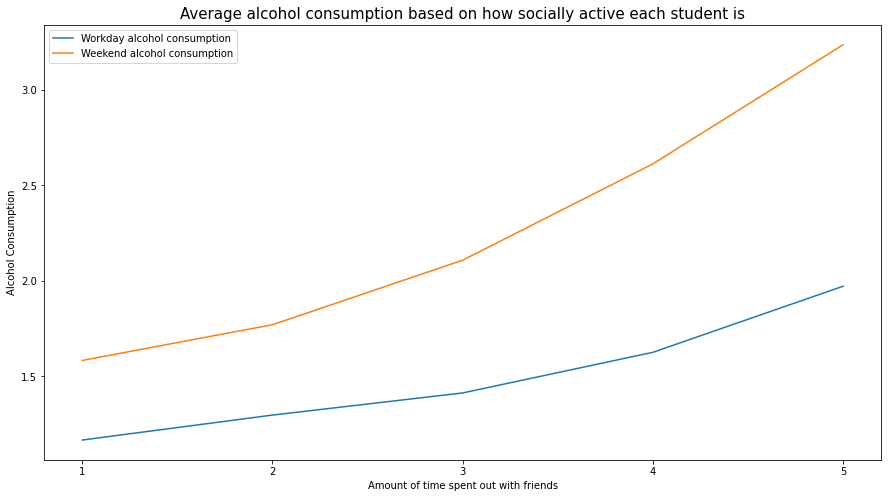

In [107]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df_GODA["goout"], y=df_GODA["Dalc"])
sns.lineplot(x=df_GOWA["goout"], y=df_GOWA["Walc"])
plt.title("Average alcohol consumption based on how socially active each student is", size=15)
plt.xlabel("Amount of time spent out with friends")
plt.ylabel("Alcohol Consumption")
plt.legend(["Workday alcohol consumption", "Weekend alcohol consumption"])

In [70]:
df_SAFTD = df_combine.groupby(['goout','freetime'])['Dalc'].mean().reset_index()
df_SAFTD["gooutfreetime"]=df_SAFTD[['goout','freetime']].agg('-'.join,axis=1)
df_SAFTW = df_combine.groupby(['goout','freetime'])['Walc'].mean().reset_index()
df_SAFTW["goout-freetime"]=df_SAFTW[['goout','freetime']].agg('-'.join,axis=1)
df_SAFTW

,goout,freetime,Walc,goout-freetime
0,1,1,1.200000,1-1
1,1,2,1.764706,1-2
2,1,3,1.333333,1-3
3,1,4,1.600000,1-4
4,1,5,2.000000,1-5
5,2,1,1.611111,2-1
6,2,2,1.756757,2-2
7,2,3,1.827586,2-3
8,2,4,1.958333,2-4
9,2,5,1.363636,2-5


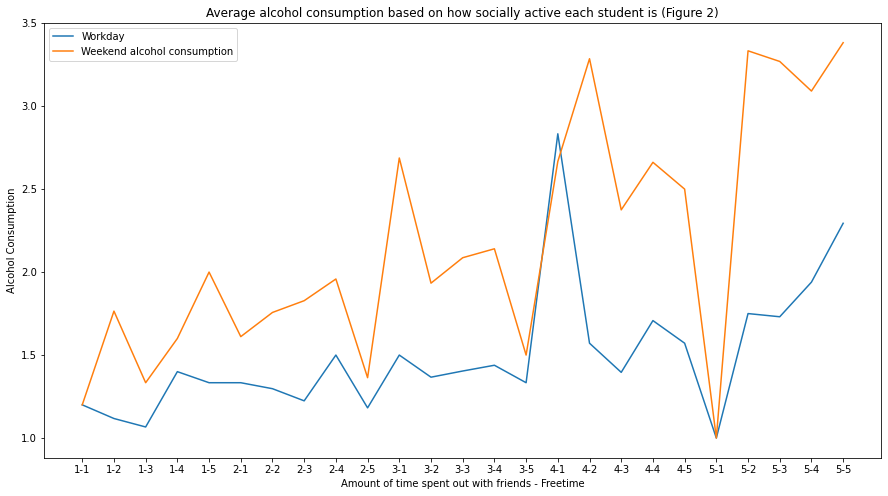

In [108]:
plt.rcParams["figure.figsize"] = (15,8)
sns.lineplot(x=df_SAFTD["gooutfreetime"], y=df_SAFTD["Dalc"])
sns.lineplot(x=df_SAFTD["gooutfreetime"], y=df_SAFTW["Walc"])
plt.title("Average alcohol consumption based on how socially active each student is (Figure 2)")
plt.xlabel("Amount of time spent out with friends - Freetime")
plt.ylabel("Alcohol Consumption")
plt.legend(["Workday", "Weekend alcohol consumption"])

After taking the average Alcohol levels per Time spent with friends - freetime, we can see theres not just one major trend among these results. Instead for each set of numbers from 1-5 we can see a steep increase in the start followed by a steep decline with some variation after that. This shows that there are many other factors that go into this besides just free time and how social a student is.

**Question 4**<br>
If they drink more, then do they miss more classes? Check for absences from students that drink compared to absences of students that don’t drink and draw conclusions.

In [95]:
print("Do students that drink more, miss more class?:")
print("(larger number means more likely to miss class)")
print("")
#weekday drinkers absence correlation for math class (larger number means more likely to miss class):
col1 = datasetm["Dalc"]
col2 = datasetm["absences"]
correlation = col1.corr(col2)
print("weekday drinkers absence correlation for math class: "+str(correlation))

#weekday drinkers absence correlation for portugese class:
col1 = datasetp["Dalc"]
col2 = datasetp["absences"]
correlation = col1.corr(col2)
print("weekday drinkers absence correlation for portugese class: "+str(correlation))

#weekend drinkers absence correlation for math class:
col1 = datasetm["Walc"]
col2 = datasetm["absences"]
correlation = col1.corr(col2)
print("weekend drinkers absence correlation for math class: "+str(correlation))

#weekend drinkers absence correlation for portugese class:
col1 = datasetp["Walc"]
col2 = datasetp["absences"]
correlation = col1.corr(col2)
print("weekend drinkers absence correlation for portugese class: "+str(correlation))
print("")
print("The data shows that students that drink more, regardless of time of the week, tend to miss more classes.")


Do students that drink more, miss more class?:
(larger number means more likely to miss class)

weekday drinkers absence correlation for math class: 0.11190802615038617
weekday drinkers absence correlation for portugese class: 0.1729524910452464
weekend drinkers absence correlation for math class: 0.136291101479951
weekend drinkers absence correlation for portugese class: 0.1563729695217541

The data shows that students that drink more, regardless of time of the week, tend to miss more classes.


Text(0, 0.5, 'Absences')

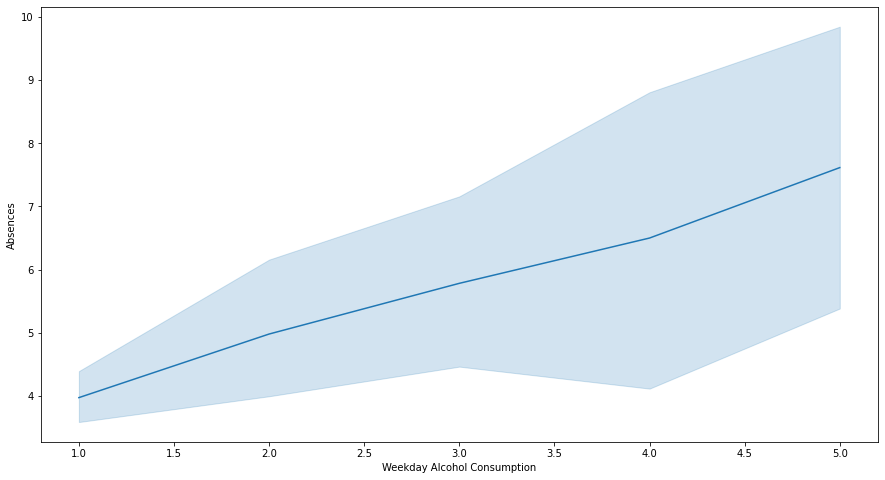

In [96]:
plt.figure(figsize=(15,8))
sns.lineplot(x="Dalc", y="absences", data=dataset)

plt.xlabel("Weekday Alcohol Consumption")
plt.ylabel("Absences")


In the graphs above, we see that regardless of the time of the week, students with higher alcohol consumption have higher absences on average.


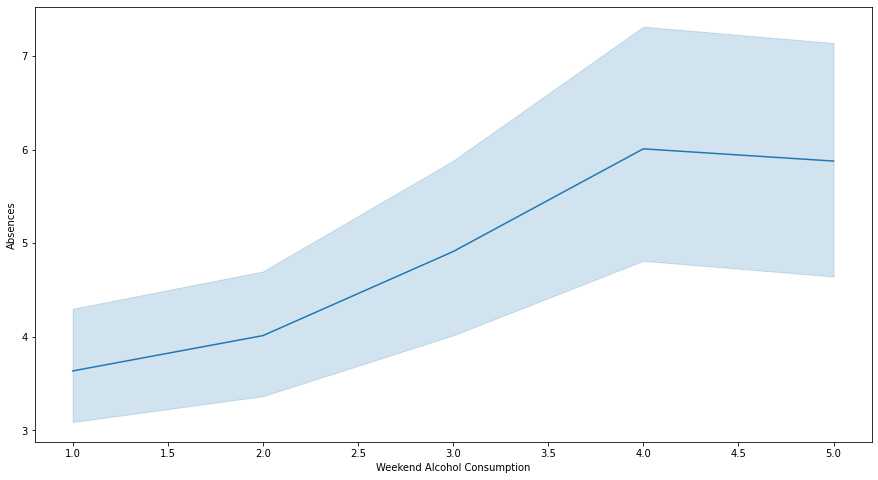

In [97]:
plt.figure(figsize=(15,8))
sns.lineplot(x="Walc", y="absences", data=dataset)

plt.xlabel("Weekend Alcohol Consumption")
plt.ylabel("Absences")
print("")
print("In the graphs above, we see that regardless of the time of the week, students with higher alcohol consumption have higher absences on average.")

**Question 5**<br>
How does drinking affect the students’ health? Compare the health of students that don’t drink to the health of students that do drink.

In [72]:
df_SHDA = df_combine.groupby('health')['Dalc'].mean().reset_index()
df_SHDA 

,health,Dalc
0,1,1.466667
1,2,1.371795
2,3,1.440299
3,4,1.550459
4,5,1.577689


In [74]:
df_SHWA = df_combine.groupby('health')['Walc'].mean().reset_index()
df_SHWA

,health,Walc
0,1,1.988889
1,2,2.205128
2,3,2.194030
3,4,2.293578
4,5,2.466135


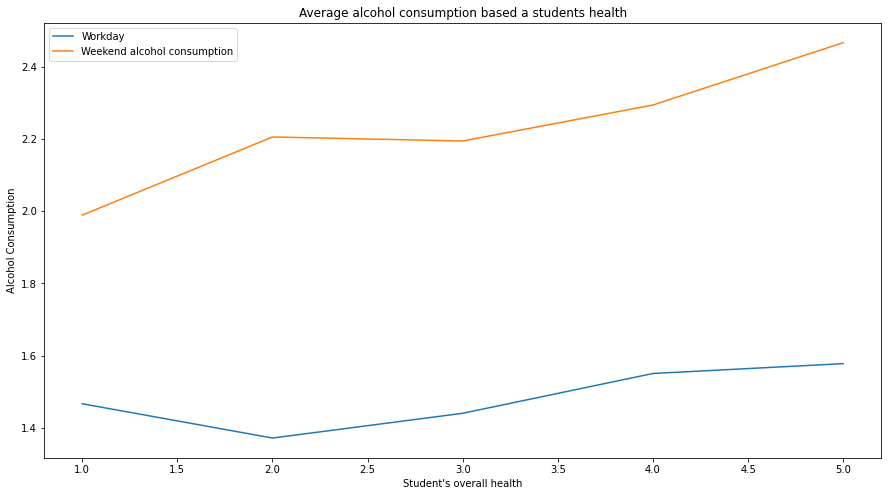

In [109]:
plt.rcParams["figure.figsize"] = (15,8)
sns.lineplot(x=df_SHDA["health"], y=df_SHDA["Dalc"])
sns.lineplot(x=df_SHWA["health"], y=df_SHWA["Walc"])
plt.title("Average alcohol consumption based a students health")
plt.xlabel("Student's overall health")
plt.ylabel("Alcohol Consumption")
plt.legend(["Workday", "Weekend alcohol consumption"])

When looking at the results shown by this graph we can see that on average students who consider themselves healthy tend to consume more alcohol. The only exception to this is for workday alcohol consumption for those who consider there health as 2 on the scale from 1-5.

**Question 6**<br>
Does family size impact whether or not the student will drink? Compare the large family sizes of kids that drink, to the small family sizes of kids that drink and see if there’s a trend / pattern

In [78]:
# get the mean of alcohol consumption during the week for both types of family sizes
dalc_famsize = df_combine.groupby('famsize')['Dalc'].mean().reset_index()
dalc_famsize

,famsize,Dalc
0,GT3,1.464208
1,LE3,1.601990


In [79]:
# get the mean of alcohol consumption during the week for both types of family sizes
walc_famsize = df_combine.groupby('famsize')['Walc'].mean().reset_index()
walc_famsize

,famsize,Walc
0,GT3,2.210412
1,LE3,2.462687


From the charts above, we can see that average alcohol consumption for students is quite low, regardless of whether it is a weekend or weekday, ranging from 1.46 to 2.46. However, it also seems that families with less than 3 people drink more than families with more than 3 people (by a margin of 0.2). So, in conclusion, yes family size can impact whether or not a student will drink. In a family of less than 3 people, the student will have a higher tendency to drink (0.2 more on the scale) compared to a student with a family size of more than 3 people.

**Question 7**<br>
do students who have one parent at home tend to drink less? To do this we will find all the students who have atleast one parent at home and assign then value each student depending on if they have one parent who stays at home.  we can then graph the students alchol consumption based on weekend and weekdays and compare trends to determine if there is a correlation. we can then calculate ratios for each of alchol consuptions amongst each group and see which what percentage of students fall under what alchol consuption group.  if the ratios are significantly different and their trends dont match its safe to say there is some correlation between the two. However if the ratio are simalar and the trends match its safe to say that there is no correlation between a students drinking habbits and weather they have one parent at home.

In [80]:
#creates new columns for that dataframe that show wether or not a student 
def is_at_home(x):
    if x == 'at_home':
        return True
    
    return False
def one_at_home(x,y):
    one = []
    for i in range(len(x)):
        if x[i] == 1 or y[i] ==1:
            one.append(1)
        else:
            one.append(0)
    return one 


M_at_home = df_combine['Mjob'].apply(is_at_home)
F_at_home = df_combine['Fjob'].apply(is_at_home)
o_at_home = one_at_home(M_at_home,F_at_home)


df_combine.insert(column='P_at_home',loc=33,value=o_at_home)
count_has_p_home = df_combine['P_at_home'].value_counts()
print(count_has_p_home)

0    493
1    169
Name: P_at_home, dtype: int64


Fjob     
P_at_home    0    1
Dalc               
1          340  119
2           92   31
3           34   11
4           14    4
5           13    4

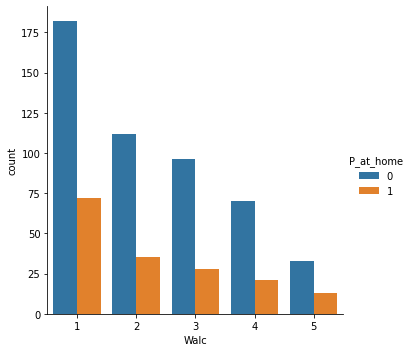

In [81]:
#creates pivot table for Dalc data and make bar graph for to get idea of data distrubution
sns.catplot(data=df_combine,kind='count', x="Walc", hue="P_at_home")
Dalc_pivot = pd.pivot_table(data=df_combine,columns=['P_at_home'] ,values=['Fjob'],index=['Dalc'],aggfunc='count')
Dalc_pivot = pd.DataFrame(data = Dalc_pivot)
Dno = Dalc_pivot['Fjob'][0].apply(func = lambda x: x/count_has_p_home[0])
Dyes = Dalc_pivot['Fjob'][1].apply(func = lambda x: x/count_has_p_home[1])
Dalc_pivot

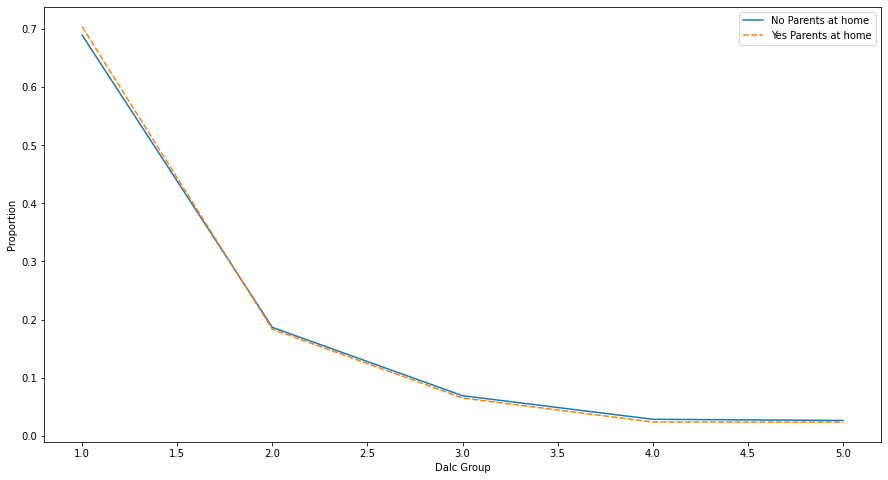

In [82]:
# prints graph of proportions
ax = sns.lineplot(data=[Dno,Dyes])
ax.set(xlabel="Dalc Group", ylabel = "Proportion") 
plt.legend(labels=["No Parents at home","Yes Parents at home"])

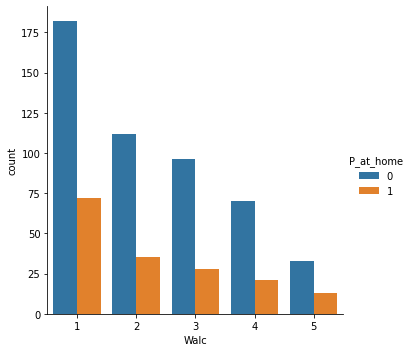

In [83]:
#creates pivot table for Walc data and make bar graph for to get idea of data distrubution
sns.catplot(data=df_combine,kind='count', x="Walc", hue="P_at_home")
Walc_pivot = pd.pivot_table(data=df_combine,columns=['P_at_home'] ,values=['Fjob'],index=['Walc'],aggfunc='count')
Walc_pivot = pd.DataFrame(data = Walc_pivot)
Wx = Walc_pivot['Fjob'][0].apply(func = lambda x: x/count_has_p_home[0])
Wy = Walc_pivot['Fjob'][1].apply(func = lambda x: x/count_has_p_home[1])

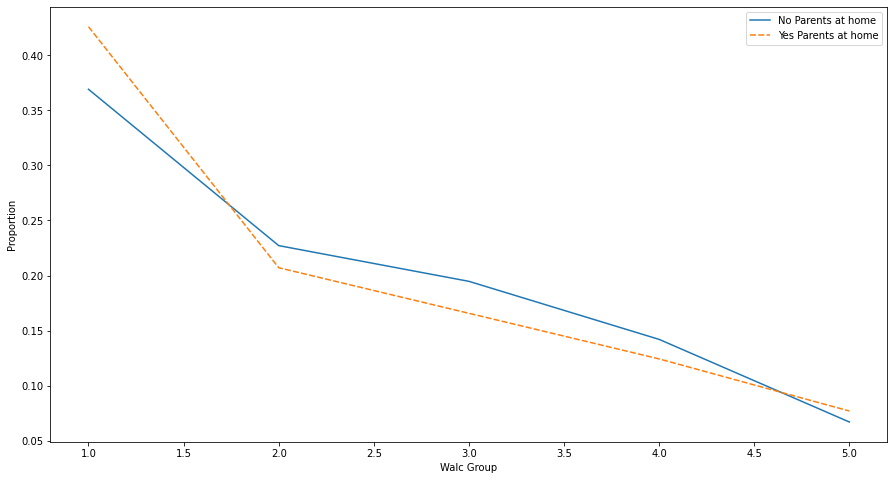

In [84]:
ax = sns.lineplot(data=[Wx,Wy])
ax.set(xlabel="Walc Group", ylabel = "Proportion") 
plt.legend(labels=["No Parents at home","Yes Parents at home"])

from the graphs above we can see that there is very little if not no correation between as the line that represtent the student who have no parents at home is almost itentical to the on that is for both graphs.

**Question 8**<br>
Do students with worse family relations tend to drink more? To answer this question we will first need to the divide the students based on which family relationships category they fall under.  then futher subdivide these groups based on there alcohol consumption categories for weekdays and weekends.  we can then then calculate what proportion of family relation group fall under which drinking category and graph the trends.  if we see a noticeable difference in propotions for of the family relation groups we can safely say that there is a trend and then all we have to do is observe it.

Fjob                
famrel    1  2   3    4   5
Walc                       
1         6  9  31  126  82
2         6  5  25   75  36
3         4  5  21   65  29
4         0  7  19   43  22
5         4  3   7   19  13

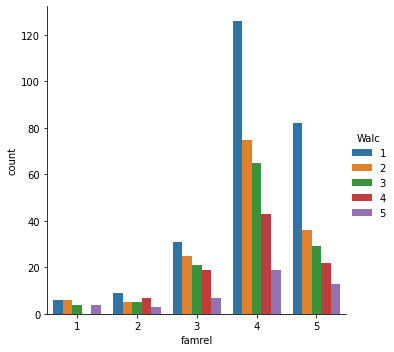

In [85]:
sns.catplot(data=df_combine,kind='count', x="famrel", hue="Walc")
Walc2_pivot = pd.pivot_table(data=df_combine,values=['Fjob'],index=['Walc'], columns=['famrel'],aggfunc='count',fill_value=0)
Walc2_pivot

Walc,1,2,3,4,5
1,0.300000,0.300000,0.200000,0.000000,0.200000
2,0.310345,0.172414,0.172414,0.241379,0.103448
3,0.300971,0.242718,0.203883,0.184466,0.067961
4,0.384146,0.228659,0.198171,0.131098,0.057927
5,0.450549,0.197802,0.159341,0.120879,0.071429


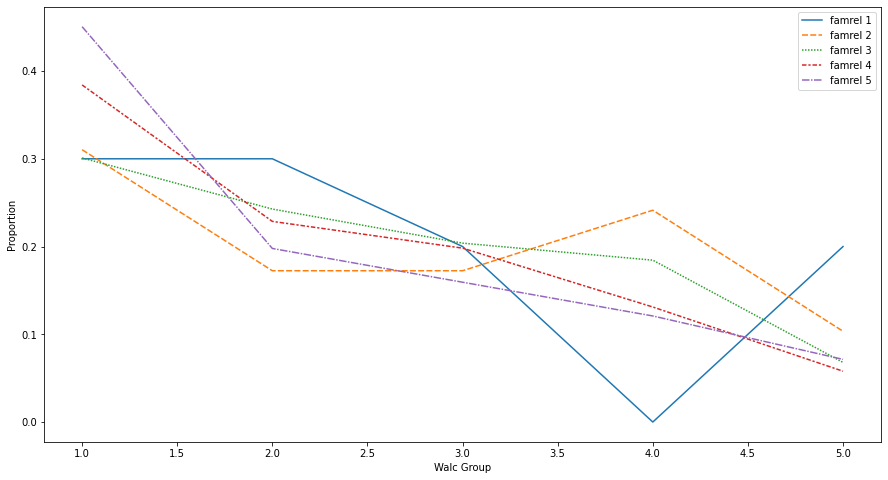

In [104]:
percent_data1 = []
for i in range(1,len(Walc2_pivot)+1):
    group_size = Walc2_pivot['Fjob'][i].sum()
    percent_data1.append(Walc2_pivot['Fjob'][i].apply(func = lambda x: x/group_size))
ax = sns.lineplot(data=percent_data1)
ax.set(xlabel="Walc Group", ylabel = "Proportion") 
ax.legend(labels=['famrel 1','famrel 2','famrel 3','famrel 4','famrel 5'])
d_df = pd.DataFrame(percent_data1)
d_df

Fjob                  
famrel    1   2   3    4    5
Dalc                         
1        10  15  70  227  137
2         4   9  23   68   19
3         3   4   4   20   14
4         2   0   5    6    5
5         1   1   1    7    7

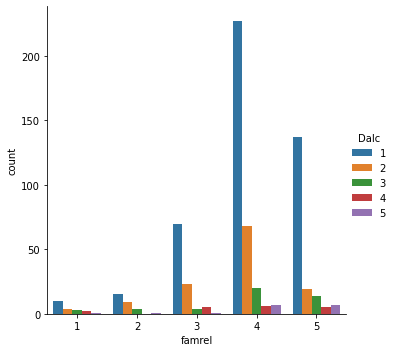

In [87]:
sns.catplot(data=df_combine,kind='count', x="famrel", hue="Dalc")
Dalc2_pivot = pd.pivot_table(data=df_combine,values=['Fjob'],index=['Dalc'], columns=['famrel'],aggfunc='count',fill_value=0)
Dalc2_pivot

Dalc,1,2,3,4,5
1,0.500000,0.200000,0.150000,0.100000,0.050000
2,0.517241,0.310345,0.137931,0.000000,0.034483
3,0.679612,0.223301,0.038835,0.048544,0.009709
4,0.692073,0.207317,0.060976,0.018293,0.021341
5,0.752747,0.104396,0.076923,0.027473,0.038462


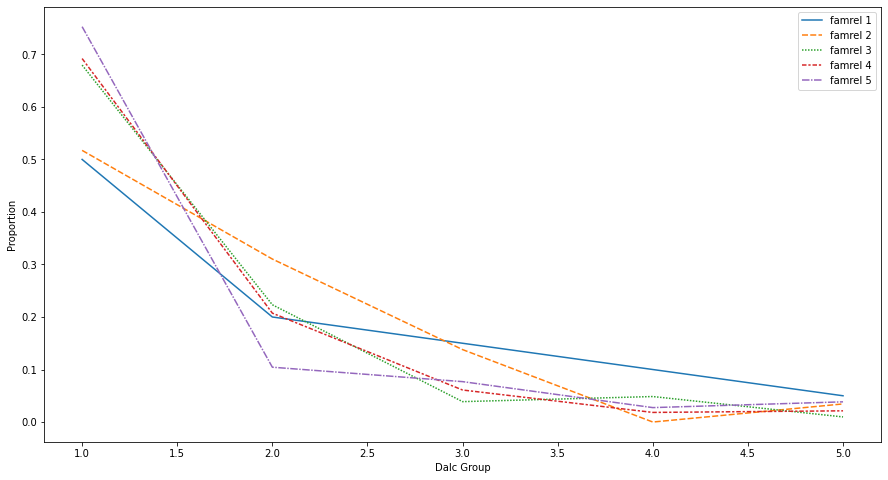

In [105]:
percent_data2 = []
for i in range(1,len(Dalc2_pivot)+1):
    group_size = Dalc2_pivot['Fjob'][i].sum()
    percent_data2.append(Dalc2_pivot['Fjob'][i].apply(func = lambda x: x/group_size))
ax1 = sns.lineplot(data=percent_data2)
ax1.set(xlabel="Dalc Group", ylabel = "Proportion") 
ax1.legend(labels=['famrel 1','famrel 2','famrel 3','famrel 4','famrel 5'])
d_df2 = pd.DataFrame(percent_data2)
d_df2

as we can see from the graphs above larger proportion of students who fall under the lowest categories of drinking when they have better family relationships and a larger proportion proportion of stundents falling under the higher for students with poor family relations.  however the lines still trend in the same directionwith the majority of student in the lowest drinking category and every following category have a smaller proportion of the students in it. this would suggest a weak correlation between these 2 variables. 


## **Potential Data Analysis:**
With the data provided, there are numerous ways it could be analyzed to provide solutions or overviews to researchers. One example would be the use of an artificial intelligence algorithm to determine the risk of a student failing a class by examining and processing the data on their alcohol consumption, and possibly other factors provided in the dataset. 
Another example could be using the same technology to detect possible cheating, if a student is obtaining higher grades than expected from the algorithm’s prediction, they could be investigated.

One relationship that seems interesting is a student’s tendency to drink and their grades. We
could use a machine learning algorithm to determine if a student’s grade is affected by their
alcohol consumption. Based on this, the algorithm will come up with an average grade range for
each period class, per numerical value of alcohol consumption. For example: The algorithm
could predict an average grade range of 16-20 for an alcohol consumption value of 1, or a grade
range of 0-10 for an alcohol consumption value of 5.

Another opportunity for potential data science could be a model that predicts future students’ likelihood to begin drinking and when they would begin drinking. We could do this by tracking certain traits like student’s free time and the quality of their family relation to how much a student drinks  and use this to determine their likelihood to begin drinking based off this. And as for determining when a student will start drinking if at all we will have would obviously have to collect data on when a student began drinking or when their drinking habits changed and then use that along with the determining the likelihood to begin drinking to determine at what age a student will begin drinking.


## **Conclusion:**
We learned a lot of things from writing this report, one of which being that its important to consider the size of different cohorts, as we might have to transform the data based on this. In Questions 7 and 8 we must divide the data into different cohorts and then subdivide the cohort based on how much they drink, however, these cohorts are of massively different sizes, and because of this we cannot simply plot them both on a graph to get an idea of the relations. So, we must divide each sub-cohort by the size of the cohort they fall under to get an idea of what proportion of students fall under each sub-cohort in each cohort. We can then graph this to get an idea how the cohort factors affect the students’ drinking habits. Another thing we learned is that some relations we thought would exist would not exist at all, or did exist but not like we initially thought. For example, in question 5 we ask the question how does a student's drinking habits affect their health, we initially assumed that the more a student drank the less healthy they would be however this turned out not to be the case and instead, students who drank more tended to be healthier. Another example would be in question 8 we asked the question do students with worse family relationships tend to drink more. We thought the answer would be a strong yes but as it would turn it does have an effect but its minimal. 

Although the data set we had was very informational and had many variables that made it
interesting to work with, it also left a lot of room for error as well. For example, when collecting
the data, students could lie about their grades, or age etc. This would lead to incorrect findings,
as well as an inaccurate data analysis.

Having the data set based on two courses (Math and Portuguese) could also be seen as a
limitation. There could be an overlap of students within both those courses, resulting in us
having duplicates, and essentially less data to work with. For example, there could have been
200 students from the Math data set, and 225 in the Portuguese data set, but potentially all 200
students from the Math set could be seen in the Portuguese set as well, meaning there were
really only 25 more students for a total of 225, rather than a total of 425 unique students.

Something else to take into account is that there were ages 19-22, which could mean that these
students maybe had to repeat some years, or also solidifies the fact that students may have lied
about their ages. This was definitely something that we did not predict happening, and since
there were only a handful of students with these ages, we included them as outliers.

Another thing that we were surprised about is that although the legal drinking age in Italy is 18,
students that were of that age did not seem to drink more than other ages and was still relatively
the same, even on weekends where students would have more free time to do so without
repercussions from having school the next day.

Overall, we learned that data cleaning in particular is very important, because we do not want
to over or under represent our data based on duplicates in our set. This would and could have
caused major issues in our findings, and in general, data cleaning made the dataset easier to
work with.

##  **Summary of Data: **

school - The school of which the student attends.  MS for Mousinho da Silveira and GP for Gabreil Pereira.

sex - The Students Gender Male(M) or Female(F). 

age - The Students age in years

address - The environment the student lives in Rural(R) and Urban(U)

famsize - The Size of the students family, GT3 if the students family is greater than 3 members

And LT3 if the student's family is less than 3 members.

Pstatus - The living status of the students' parents.  If they are living together then (T) and if the living apart(A)

Medu - The Mothers' education on a scale from 1 to 5 where 1 represents only completing up to primary education( grade 4) and 5 

represents completing some sort of higher education. 

Fedu - The Fathers' education on a scale from 1 to 5 where 1 represents only completing up to primary education( grade 4) and 5 

represents completing some sort of higher education. 

Mjob - The mothers’ job occupation(the sector she works in). Can be one of the following (Teacher, Health(works in healthcare), 

Service(works as civil servant),at_home, other)

Fjob - The Fathers’ job occupation(the sector he works in). Can be one of the following (Teacher, Health(works in healthcare), 

Service(works as civil servant),at_home, other)

reason - Reason for choosing to enroll in their school

guardian - Student’s current guardian (‘mother’, ‘father’ or ‘other’)

traveltime - Time it takes to get to school (1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - Time spent studying each week (1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - Amount of past class failures 

schoolsup - Receiving extra educational support (yes/no)

paid - Taking extra paid classes within the courses’ subject (yes/no)

activities - Taking extra-curricular activities (yes/no)

nursery  - Attended nursery school (yes/no)

higher - Wants to take higher education (yes/no)

internet - Access to the internet at home (yes/no)

romantic - In a romantic relationship (yes/no)

famrel - Quality of family relationships (1 -worst to 5 -best)

freetime - Free time after school (1 -least to 5 -most)

goout - Amount of time spent out with friends (1 -least to 5 -most)

Dalc - Workday alcohol consumption (1 -least to 5 -most)

Walc - Weekend alcohol consumption (1 -least to 5 -most)

health - Current state of health (1 -worst to 5 -best)

absences - Number of absences from school (0-93)

G1 - First period grade (0-20)

G2 - Second period grade (0-20)

G3 - Final grade (0-20)
